In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

In [3]:
my_feature

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]

In [4]:
my_label

[5.0, 8.8, 9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2]

In [5]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


In [6]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Epoch 1/10
1/1 [==============================] - 0s 0s/step - loss: 541.9189 - root_mean_squared_error: 23.2792
Epoch 2/10
1/1 [==============================] - 0s 0s/step - loss: 529.8420 - root_mean_squared_error: 23.0183
Epoch 3/10
1/1 [==============================] - 0s 0s/step - loss: 521.2123 - root_mean_squared_error: 22.8301
Epoch 4/10
1/1 [==============================] - 0s 0s/step - loss: 514.0642 - root_mean_squared_error: 22.6730
Epoch 5/10
1/1 [==============================] - 0s 0s/step - loss: 507.7756 - root_mean_squared_error: 22.5339
Epoch 6/10
1/1 [==============================] - 0s 0s/step - loss: 502.0583 - root_mean_squared_error: 22.4067
Epoch 7/10
1/1 [==============================] - 0s 0s/step - loss: 496.7518 - root_mean_squared_error: 22.2879
Epoch 8/10
1/1 [==============================] - 0s 0s/step - loss: 491.7566 - root_mean_squared_error: 22.1756
Epoch 9/10
1/1 [==============================] - 0s 0s/step - loss: 487.0059 - root_mean_square

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


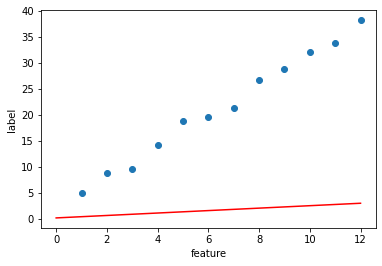

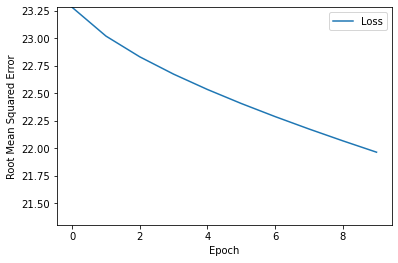

In [7]:
learning_rate = 0.01
epochs =10
my_batch_size =12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model,my_feature,my_label,epochs,my_batch_size)

plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)


Epoch 1/70
1/1 [==============================] - 0s 2ms/step - loss: 141.7616 - root_mean_squared_error: 11.9064
Epoch 2/70
1/1 [==============================] - 0s 1000us/step - loss: 68.3880 - root_mean_squared_error: 8.2697
Epoch 3/70
1/1 [==============================] - 0s 0s/step - loss: 37.6636 - root_mean_squared_error: 6.1371
Epoch 4/70
1/1 [==============================] - 0s 997us/step - loss: 21.5427 - root_mean_squared_error: 4.6414
Epoch 5/70
1/1 [==============================] - 0s 0s/step - loss: 12.4983 - root_mean_squared_error: 3.5353
Epoch 6/70
1/1 [==============================] - 0s 0s/step - loss: 7.3330 - root_mean_squared_error: 2.7079
Epoch 7/70
1/1 [==============================] - 0s 0s/step - loss: 4.3993 - root_mean_squared_error: 2.0974
Epoch 8/70
1/1 [==============================] - 0s 1ms/step - loss: 2.7647 - root_mean_squared_error: 1.6627
Epoch 9/70
1/1 [==============================] - 0s 959us/step - loss: 1.8794 - root_mean_squared_error

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


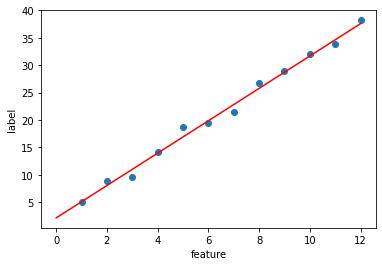

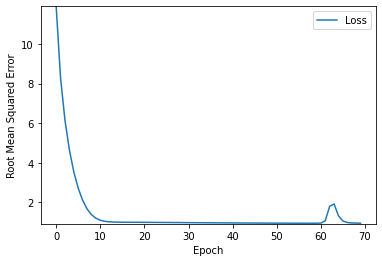

In [8]:
learning_rate=0.14
epochs=70
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/100
12/12 [==============================] - 0s 672us/step - loss: 563.3236 - root_mean_squared_error: 23.7344
Epoch 2/100
12/12 [==============================] - 0s 0s/step - loss: 367.8399 - root_mean_squared_error: 19.1792
Epoch 3/100
12/12 [==============================] - 0s 1ms/step - loss: 248.0170 - root_mean_squared_error: 15.7486
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: 157.6695 - root_mean_squared_error: 12.5567
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: 93.2211 - root_mean_squared_error: 9.6551
Epoch 6/100
12/12 [==============================] - 0s 0s/step - loss: 45.5978 - root_mean_squared_error: 6.7526
Epoch 7/100
12/12 [==============================] - 0s 839us/step - loss: 16.5744 - root_mean_squared_error: 4.0712
Epoch 8/100
12/12 [==============================] - 0s 94us/step - loss: 4.6013 - root_mean_squared_error: 2.1451
Epoch 9/100
12/12 [==============================] - 0s 1ms/step - los

12/12 [==============================] - 0s 0s/step - loss: 1.1796 - root_mean_squared_error: 1.0861
Epoch 73/100
12/12 [==============================] - 0s 1ms/step - loss: 1.0243 - root_mean_squared_error: 1.0121
Epoch 74/100
12/12 [==============================] - 0s 1ms/step - loss: 1.1965 - root_mean_squared_error: 1.0939
Epoch 75/100
12/12 [==============================] - ETA: 0s - loss: 2.1255 - root_mean_squared_error: 1.457 - 0s 1ms/step - loss: 1.2529 - root_mean_squared_error: 1.1194
Epoch 76/100
12/12 [==============================] - 0s 0s/step - loss: 1.1193 - root_mean_squared_error: 1.0580
Epoch 77/100
12/12 [==============================] - 0s 0s/step - loss: 1.1490 - root_mean_squared_error: 1.0719
Epoch 78/100
12/12 [==============================] - 0s 0s/step - loss: 0.9463 - root_mean_squared_error: 0.9728
Epoch 79/100
12/12 [==============================] - 0s 0s/step - loss: 1.2552 - root_mean_squared_error: 1.1204
Epoch 80/100
12/12 [====================

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


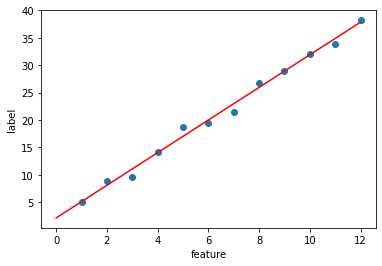

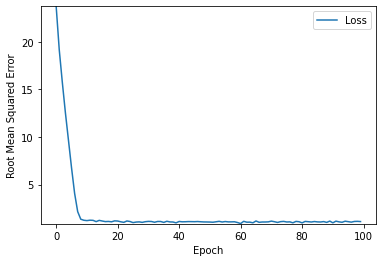

In [9]:
learning_rate=0.05
epochs=100
my_batch_size= 1  # Replace ? with an integer.

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)